# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [7]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [8]:
y_train[:5]

array([12. , 19.9, 19.4, 13.4, 18.2])

In [9]:
y_test[:5]

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [12]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.291339,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.333810,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.400723,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.391278,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.322701,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [13]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [14]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.394275,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.398264,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.392699,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.394291,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.169988,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


In [15]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [16]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

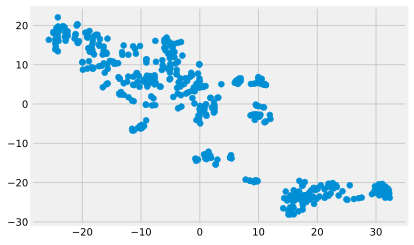

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [18]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

**На наборе X_train**

In [19]:
labels_train = model.fit_predict(X_train)

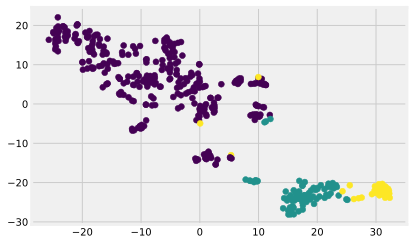

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [21]:
print(f'Кластер 0: {y_train[labels_train == 0].mean()}')
print(f'Кластер 1: {y_train[labels_train == 1].mean()}')
print(f'Кластер 2: {y_train[labels_train == 2].mean()}')

Кластер 0: 25.16868686868687
Кластер 1: 17.442105263157895
Кластер 2: 13.196774193548388


In [22]:
print(f'Кластер 0: {X_train.loc[labels_train == 0, "CRIM"].mean()}')
print(f'Кластер 1: {X_train.loc[labels_train == 1, "CRIM"].mean()}')
print(f'Кластер 2: {X_train.loc[labels_train == 2, "CRIM"].mean()}')

Кластер 0: 0.40486282828282844
Кластер 1: 11.745661842105266
Кластер 2: 14.037799677419358


**На масштабированном наборе X_train_scaled**

In [23]:
labels_train_scaled = model.fit_predict(X_train_scaled)

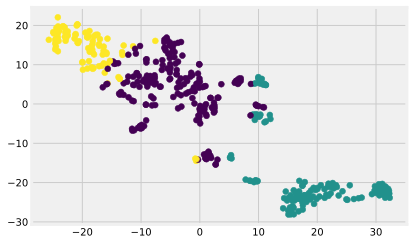

In [24]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train_scaled)
plt.show()

In [25]:
print(f'Кластер 0: {y_train[labels_train_scaled == 0].mean()}')
print(f'Кластер 1: {y_train[labels_train_scaled == 1].mean()}')
print(f'Кластер 2: {y_train[labels_train_scaled == 2].mean()}')

Кластер 0: 24.971204188481675
Кластер 1: 16.1796875
Кластер 2: 27.87411764705882


In [26]:
print(f'Кластер 0: {X_train.loc[labels_train_scaled == 0, "CRIM"].mean()}')
print(f'Кластер 1: {X_train.loc[labels_train_scaled == 1, "CRIM"].mean()}')
print(f'Кластер 2: {X_train.loc[labels_train_scaled == 2, "CRIM"].mean()}')

Кластер 0: 0.42098554973821983
Кластер 1: 10.637094062500003
Кластер 2: 0.0721184705882353


## Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [27]:
labels_test = model.fit_predict(X_test)

In [28]:
print(f'Кластер 0: {y_test[labels_test == 0].mean()}')
print(f'Кластер 1: {y_test[labels_test == 1].mean()}')
print(f'Кластер 2: {y_test[labels_test == 2].mean()}')

Кластер 0: 23.91159420289855
Кластер 1: 17.392307692307693
Кластер 2: 12.814285714285713


In [29]:
print(f'Кластер 0: {X_test.loc[labels_test == 0, "CRIM"].mean()}')
print(f'Кластер 1: {X_test.loc[labels_test == 1, "CRIM"].mean()}')
print(f'Кластер 2: {X_test.loc[labels_test == 2, "CRIM"].mean()}')

Кластер 0: 0.2464211594202899
Кластер 1: 8.469301923076923
Кластер 2: 19.021665714285714
